##### KOD: Import

In [1]:
from src import metrics as M, viz as V,io_utils as IO

#### KOD: Ladda in data och tvättar den

In [2]:
sales_data_df = IO.load_data("data/ecommerce_sales.csv")
clean_sales_data_df = IO.clean_data(sales_data_df)
clean_sales_data_df.head(3)



,order_id,date,city,category,price,units,revenue
0,100000,2024-04-19,Stockholm,Sports,530.95,4,2123.80
1,100001,2024-05-06,Malmö,Sports,653.28,3,1959.84
2,100002,2024-03-07,Uppsala,Clothing,177.98,4,711.92


# Goods Online analys av försäljningsdata

## Frågeställning

1. Vad säljer? – vilka kategorier driver mest intäkt?
1. Var säljer vi? – vilka städer står för störst intäkt?
1. När säljer vi? – finns tidsmönster/säsong i försäljningen?
1. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.
1. Topp-listor – topp-3 kategorier efter intäkt.
1. Eventuella avvikelser – något oväntat mönster som sticker ut?

### 1.  Vad säljer? – vilka kategorier driver mest intäkt?

   category    revenue
Electronics 1364228.07
     Sports  734653.42
   Clothing  586744.91
       Home  511070.87
     Beauty  163053.97
       Toys  143015.99


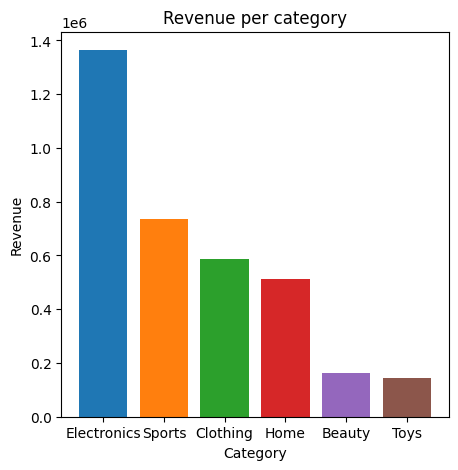

In [3]:
print(M.revenue_per_category(clean_sales_data_df).to_string(index=False))

V.bar_graph(clean_sales_data_df,'category','revenue','Revenue per category','Category','Revenue')

#### Slutsats: 

Som summeringen av datan per kategori visar så är **elektronik** er största intäktskälla, **sport** er näst största och **kläder/hem** i en rätt delad tredjeplats.

De sämsta produktkategorin är **skönhet** och **leksaker**.

### 2. Var säljer vi? – vilka städer står för störst intäkt?

     city    revenue  percent
Stockholm 1227201.94     35.0
 Göteborg  859019.65     25.0
    Malmö  567926.32     16.0
  Uppsala  551478.42     16.0
 Västerås  297140.90      8.0


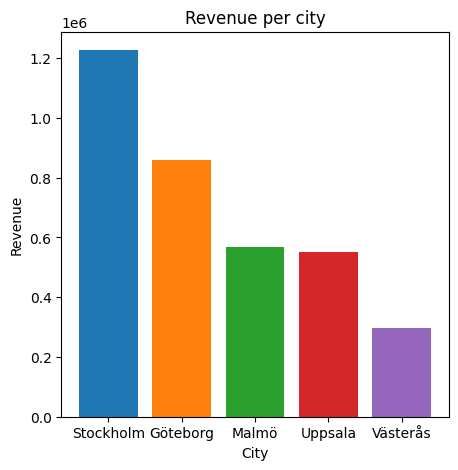

In [4]:
data_city = M.revenue_per_city(clean_sales_data_df)
total_revenue = data_city['revenue'].sum()
data_city['percent'] = round((data_city['revenue'] / total_revenue * 100),0)
print(data_city.to_string(index=False))
V.bar_graph(clean_sales_data_df,'city','revenue','Revenue per city','City','Revenue')




#### Slutsats:

Stockholm och Göteborg står för 60% av de totala intäkerna. Varav Stockholm är den stad som är mest lukrativ på 35%.

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

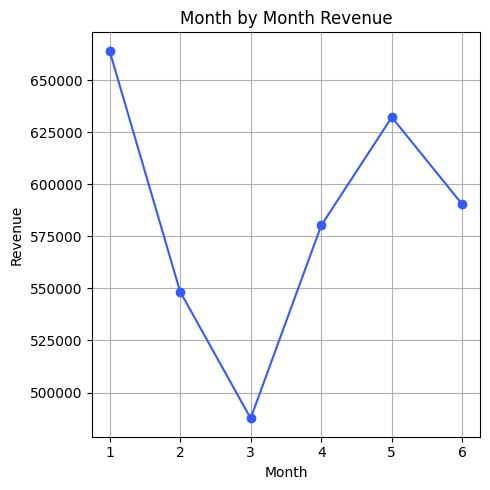

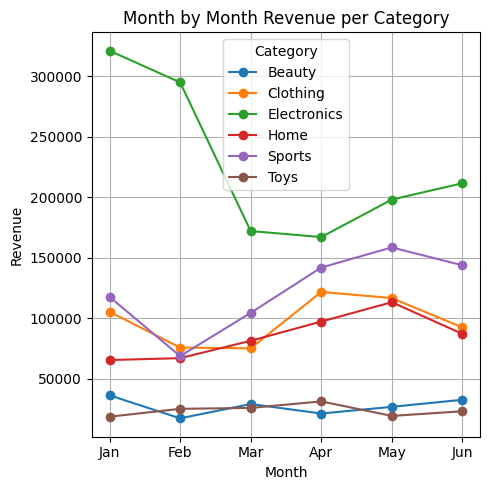

In [5]:
V.month_by_month_revenue_graph(sales_data_df)
V.revenue_by_category(clean_sales_data_df)

#### Slutsats:

Ni börjar året väldigt starkt, troligtvis kopplat till försäljningen kring jul. Sedan ser man en nedåtgående trend i början av året som sedan återhämtar sig lite till tidigare nivåer in mot våren/sommaren. Samtliga kategorier följer trenderna rätt identiskt men **beauty** och **Leksaker** verkar inte vara lika påverkade av vilken tid på året det är men står dock för en lägre andel av försäljningen.

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.

In [6]:
print(M.category_aov_std(clean_sales_data_df).to_string(index=False))

print("-"*35)

print(M.aup_per_category(clean_sales_data_df).to_string(index=False))

print("-"*35)

print(M.orders_per_category(clean_sales_data_df).to_string(index=False))


   category         aov         std   median
Electronics 2207.488786 1531.683343 1844.940
     Sports 1770.249205 1080.907882 1595.760
   Clothing 1152.740491  765.741562 1016.240
       Home 1043.001776  721.206143  897.705
     Beauty  676.572490  482.360925  584.910
       Toys  630.026388  468.674026  533.980
-----------------------------------
   category        aup        std
Electronics 778.224797 381.857983
     Sports 524.377887 210.204356
       Home 399.898959 192.159423
   Clothing 354.528647 152.812299
     Beauty 247.426358 118.353511
       Toys 199.464421 105.553493
-----------------------------------
   category  num_orders
Electronics         618
   Clothing         509
       Home         490
     Sports         415
     Beauty         241
       Toys         227


#### Slutsats:

Elektronik och sport driver högst intäkter per order. Man ser dock en väldigt stor spridning (std) på samtliga kategorier vilket kan tolkas som vi har väldigt stor variation kring ordrarna.  
Vilket stärks genom att det finns ett stort antal orders per kategori samt att medianen är någorlunda nära AOV.

### 5. Topp-listor – topp-3 kategorier efter intäkt.

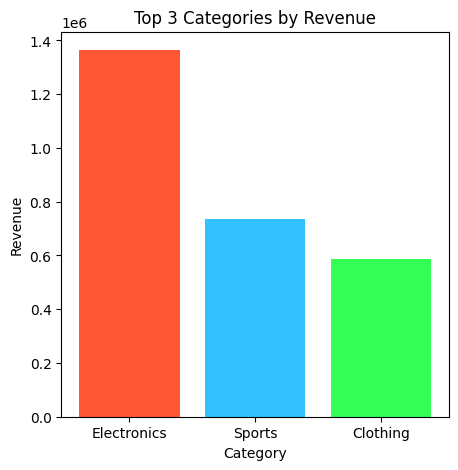

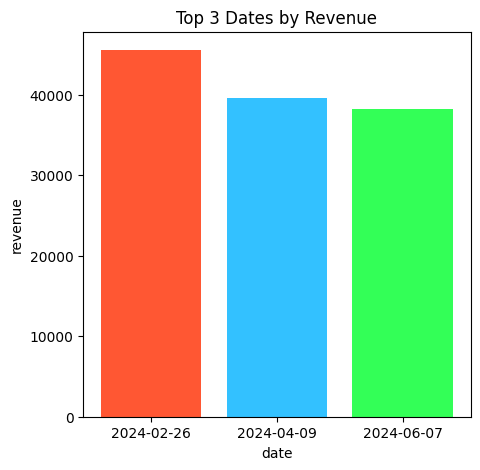

In [7]:
V.top_3_category_by_revenue_graph(sales_data_df)
V.top_3_date_by_revenue_graph(sales_data_df)

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?

Ni har väldigt höga variationer i era orders. Vilket betyder att ordrarna har väldigt varierande summor.
Även priset på produkterna har hög spridning vilket delger att det säljs både produkter med lägre pris stycke pris samt högre stycke pris.  
Er bästa försäljningsdag är i februari trots att januari är er bästa totala månad.

# Rekommendation

Ur denna datan så rekommenderar vi följande:

- Satsa på segmenten Elektronik och Sport
- Många segment är väldigt säsongsbetingade men leksaker och skönhet sticker ut med sin stabiitet. Det gör det enklare att planera lagerhållning.
- Stockholm och Göteborg är er starkaste marknad just nu. Kan vara värt att se över marknadsföringen för att nå ut till de mindre marknaderna. Är värt att gå närmare in på varför det skiljer sig åt.